In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from utils import check_null_values, staff_hours_per_person

In [54]:
q4_holidays = ['2020-11-23','2020-11-24','2020-11-25','2020-11-26', '2020-11-27', '2020-12-21',
            '2020-12-22', '2020-12-23','2020-12-24', '2020-12-25', '2020-12-31']

# There are totally 128 unique provider numbers from Ensign
provider_df = pd.read_csv('Our_Provider_numbers.csv')
provider_df.head()

prov_nums = provider_df['our_provnum']
ensign_prov_nums = prov_nums.squeeze().squeeze().tolist()

### Drop
(1) Total nurse staffing <1.5 hours per resident per day; or  
(2) Total nurse staffing > 12 hours per resident per day; or  
(3) Nurse aide staffing > 5.25 hours per resident per day  
(4) MDScensus = 0  

In [55]:
def drop_by_hours_per_person(df):
    df = df[df['total_hours'] > 1.5]
    df = df[df['total_hours'] < 12.0]
    df = df[df['Hrs_NAtrn'] < 5.25]
    df = df[df['MDScensus'] > 0]
    
    return df

In [4]:
def add_features(origin_df, holidays, prov_nums):
    df = origin_df.copy()
    df = df[df['MDScensus'] > 0]
    df['WorkDate'] = pd.to_datetime(df.WorkDate, format="%Y%m%d")
    df['year'] = df['WorkDate'].dt.year
    df['month'] = df['WorkDate'].dt.month
    df['day'] = df['WorkDate'].dt.day
    df['day_name'] = df['WorkDate'].dt.day_name()
    df['is_weekend'] = (df['WorkDate'].dt.dayofweek // 5 == 1).astype(bool)
    df['is_holiday_week'] = df['WorkDate'].dt.date.astype('datetime64').isin(holidays)
    df['IsEnsign'] = df['PROVNUM'].isin(prov_nums)
    df['total_hours'] = df['Hrs_RNDON'] + df['Hrs_RNadmin'] + df['Hrs_RN'] + df['Hrs_LPNadmin'] + df['Hrs_LPN'] + df['Hrs_CNA'] + df['Hrs_NAtrn'] + df['Hrs_MedAide']
    df['total_admin_hours'] = df['Hrs_RNDON'] + df['Hrs_RNadmin'] + df['Hrs_LPNadmin']
    df['total_non_admin'] = df['Hrs_RN'] + df['Hrs_LPN'] + df['Hrs_CNA'] + df['Hrs_NAtrn'] + df['Hrs_MedAide']
    df['total_ctr_hours'] = df['Hrs_RN_ctr'] + df['Hrs_LPNadmin_ctr'] + df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr'] + df['Hrs_NAtrn_ctr'] + df['Hrs_MedAide_ctr']
    df['total_non_ctr'] = df['total_hours'] - df['total_ctr_hours']
#     df.drop(df.iloc[:, 9:33], inplace = True, axis = 1)
    return df

In [5]:
hour_features = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr','Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp','Hrs_MedAide_ctr']
features = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr', 'Hrs_NAtrn']

In [6]:
# non_nursing_df = pd.read_csv('PBJ_Daily_Non-Nurse_Staffing_CY_2020Q4.csv')
# non_nursing_df.head()

In [7]:
# non_nursing_df = add_features(non_nursing_df, q4_holidays, ensign_prov_nums)
# non_nursing_df.head()

In [56]:
nursing_df = pd.read_csv('PBJ_Daily_Nurse_Staffing_CY_2020Q4.csv')
nursing_df.head()

c:\users\hua13\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201001,52,0.00,...,0.0,145.73,138.23,7.50,7.75,7.75,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201002,52,7.00,...,0.0,146.21,138.46,7.75,0.00,0.00,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201003,52,0.00,...,0.0,140.66,140.66,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201004,51,0.00,...,0.0,115.95,108.45,7.50,0.00,0.00,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,20201005,51,8.25,...,0.0,154.85,143.10,11.75,7.75,7.75,0.0,0.0,0.0,0.0


In [9]:
nursing_df.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

#### Columns with high zero values: 
       'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin',  
       'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin',  
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr',  
       'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide',  
       'Hrs_MedAide_emp', 'Hrs_MedAide_ctr'  

In [10]:
nurse_null_df = check_null_values(nursing_df)
nurse_null_df[nurse_null_df['percent_zero'] > 39.0].columns

Index(['columns', 'percent_null', 'percent_zero'], dtype='object')

In [57]:
all_nursing_df = add_features(nursing_df, q4_holidays, ensign_prov_nums)
all_nursing_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06
mean,2.919040e+02,2.191674e+01,2.699872e+02,1.321208e+01,2.786919e+02,5.490775e+00
std,1.800604e+02,2.226532e+01,1.689143e+02,3.627630e+01,1.729659e+02,1.415226e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.750000e+02,5.710000e+00,1.607500e+02,0.000000e+00,1.663000e+02,0.000000e+00
50%,2.562500e+02,1.650000e+01,2.364000e+02,0.000000e+00,2.450000e+02,0.000000e+00
75%,3.622075e+02,3.200000e+01,3.352500e+02,8.000000e+00,3.477275e+02,0.000000e+00
max,4.316830e+03,4.290000e+02,3.937330e+03,1.137730e+03,4.316830e+03,2.772500e+02


In [64]:
ensign_nurse_df = all_nursing_df[all_nursing_df["IsEnsign"] == True]
ensign_nurse_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000
mean,279.750360,22.169409,257.580951,2.813189,276.937171,10.060573
std,119.988771,16.368282,114.839496,9.496873,119.397655,16.495480
min,56.640000,0.000000,56.640000,0.000000,56.640000,0.000000
25%,198.972500,8.000000,181.767500,0.000000,196.777500,0.000000
50%,262.885000,24.000000,239.495000,0.000000,260.260000,0.000000
75%,331.882500,32.070000,303.210000,0.000000,328.790000,15.250000
max,918.600000,89.500000,864.320000,110.170000,918.600000,134.270000


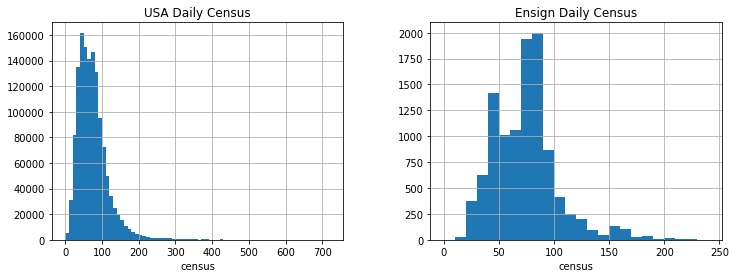

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
all_nursing_df.hist('MDScensus', bins=np.arange(0, all_nursing_df['MDScensus'].max() + 10, 10) , ax=axes[0])
axes[0].set_title('USA Daily Census')
axes[0].set_xlabel('census')
ensign_nurse_df.hist('MDScensus', bins=np.arange(0, ensign_nurse_df['MDScensus'].max() + 10, 10) , ax=axes[1])
axes[1].set_title('Ensign Daily Census')
axes[1].set_xlabel('census');

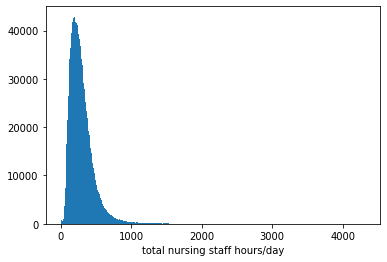

In [36]:
# Distribution of total nursing staff hours
bins = np.arange(0, all_nursing_df['total_hours'].max() + 10, 10)
plt.hist(all_nursing_df['total_hours'], bins=bins)
plt.xlabel('total nursing staff hours/day');

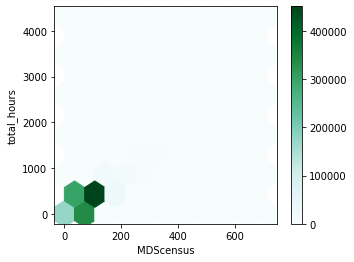

In [25]:
ax = all_nursing_df.plot.hexbin(x='MDScensus', y='total_hours', gridsize=10, sharex=False, figsize=(5,4))

In [37]:
per_patient_nurse_df = staff_hours_per_person(all_nursing_df, hour_features)
per_patient_nurse_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06,1.350550e+06
mean,4.102670e+00,3.276825e-01,3.775038e+00,1.720989e-01,3.930575e+00,7.729133e-02
std,1.579512e+00,3.375515e-01,1.429599e+00,4.160924e-01,1.600422e+00,1.956289e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.340000e+00,7.000000e-02,3.090000e+00,0.000000e+00,3.160000e+00,0.000000e+00
50%,3.910000e+00,2.900000e-01,3.610000e+00,0.000000e+00,3.770000e+00,0.000000e+00
75%,4.610000e+00,4.800000e-01,4.240000e+00,1.300000e-01,4.470000e+00,0.000000e+00
max,2.446000e+02,4.000000e+01,2.218200e+02,2.000000e+01,2.446000e+02,4.800000e+00


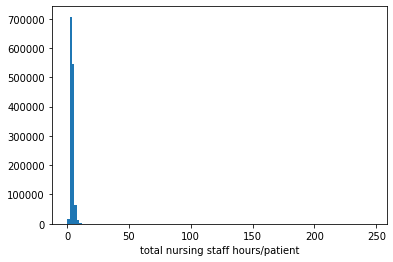

In [38]:
bins = np.arange(0, per_patient_nurse_df['total_hours'].max() + 2, 2)
plt.hist(per_patient_nurse_df['total_hours'], bins=bins)
plt.xlabel('total nursing staff hours/patient');

In [12]:
clean_all_df = drop_by_hours_per_person(all_nursing_df)
clean_all_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,1.340575e+06,1.340575e+06,1.340575e+06,1.340575e+06,1.340575e+06,1.340575e+06
mean,4.102563e+00,3.262764e-01,3.776337e+00,1.725934e-01,3.929973e+00,7.775059e-02
std,1.165389e+00,3.055112e-01,1.050318e+00,4.155742e-01,1.196992e+00,1.958824e-01
min,1.510000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.360000e+00,7.000000e-02,3.100000e+00,0.000000e+00,3.170000e+00,0.000000e+00
50%,3.920000e+00,2.900000e-01,3.610000e+00,0.000000e+00,3.770000e+00,0.000000e+00
75%,4.610000e+00,4.900000e-01,4.240000e+00,1.400000e-01,4.480000e+00,0.000000e+00
max,1.199000e+01,1.050000e+01,1.199000e+01,9.420000e+00,1.199000e+01,4.550000e+00


In [13]:
# ensign_nn_df = non_nursing_df[non_nursing_df["IsEnsign"] == True]
# ensign_nn_df.head()

In [14]:
ensign_nurse_df = clean_all_df[clean_all_df["IsEnsign"] == True]
ensign_nurse_df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,day,day_name,is_weekend,is_holiday_week,IsEnsign,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr
34224,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-01,78,0.10,...,1,Thursday,False,False,True,5.14,0.41,4.73,0.46,4.68
34225,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-02,72,0.11,...,2,Friday,False,False,True,5.70,0.44,5.26,0.65,5.06
34226,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-03,72,0.00,...,3,Saturday,True,False,True,4.54,0.00,4.54,0.81,3.73
34227,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-04,75,0.00,...,4,Sunday,True,False,True,4.06,0.00,4.06,0.57,3.49
34228,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-05,73,0.11,...,5,Monday,False,False,True,5.00,0.44,4.56,0.22,4.78


In [15]:
# ensign_nn_df["PROVNUM"].nunique()

In [16]:
ensign_nurse_df["PROVNUM"].nunique()

116

In [17]:
exist_pv = ensign_nurse_df["PROVNUM"].unique().astype('int32').squeeze().tolist()
non_exist_pv = []
for num in prov_nums:
    if num not in exist_pv:
        non_exist_pv.append(num)

In [18]:
len(non_exist_pv) + len(exist_pv) == len(prov_nums)

True

In [19]:
# ensign_nurse_df.to_csv(r'C:\Users\hua13\Google Drive\Ensign\ensign_nurse_df.csv', index=False, header=True)
# ensign_nn_df.to_csv(r'C:\Users\hua13\Google Drive\Ensign\ensign_nn_df.csv', index=False, header=True)

# clean_all_df.to_csv(r'C:\Users\hua13\Google Drive\Ensign\all_nurse_df.csv', index=False, header=True)
# non_nursing_df.to_csv(r'C:\Users\hua13\Google Drive\Ensign\all_nn_df.csv', index=False, header=True)